## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Read dataset

In [2]:
# Data loader function (from preprocessing notebook)
def data_loader(path='https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv',
                preprocessing=False):
    df = pd.read_csv(path)
    if preprocessing == True:
        df['date'] = pd.to_datetime(df['date'])
        df['department'] = df['department'].apply(lambda x: 'sewing' if x == 'sweing' else 'finishing')
        df['team'] = df['team'].apply(lambda x: 'Team'+str(int(x)))
        from sklearn.impute import KNNImputer
        imputer = KNNImputer()
        df[df.columns[5:]] = imputer.fit_transform(df.iloc[:,5:])
    return df

In [3]:
df = data_loader(preprocessing=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   float64       
 9   incentive              1197 non-null   float64       
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   float64       
 12  no_of_style_change     1197 non-null   float64       
 13  no_

## Descriptive statistics

Thống kê mô tả biến kiểu số.

In [5]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1069.041771,1414.802853,7.000000,773.400000,983.000000,1119.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000
actual_productivity,1197.0,0.735091,0.174488,0.233705,0.650307,0.773333,0.850253,1.120437


Thống kê mô tả biến kiểu phân loại.

In [6]:
df.describe(include='O').T

,count,unique,top,freq
quarter,1197,5,Quarter1,360
department,1197,2,sewing,691
day,1197,6,Wednesday,208
team,1197,12,Team8,109


Khảo sát biến phụ thuộc.

In [7]:
print('Mean',df['actual_productivity'].mean())
print('Variance:',df['actual_productivity'].var())
print('Skewness:',df['actual_productivity'].skew())
print('Kurtosis:',df['actual_productivity'].kurt())

Mean 0.7350910969791145
Variance: 0.03044602847110404
Skewness: -0.8074917745097576
Kurtosis: 0.33322734124329134


Skewness < 0 $\Rightarrow$ biến lệch trái (negatively-skewed).<br>
Kurtosis > 0 $\Rightarrow$ biến có phần đuôi rộng, có nhiều giá trị ngoại lệ (leptokurtic).

<AxesSubplot: xlabel='actual_productivity', ylabel='Density'>

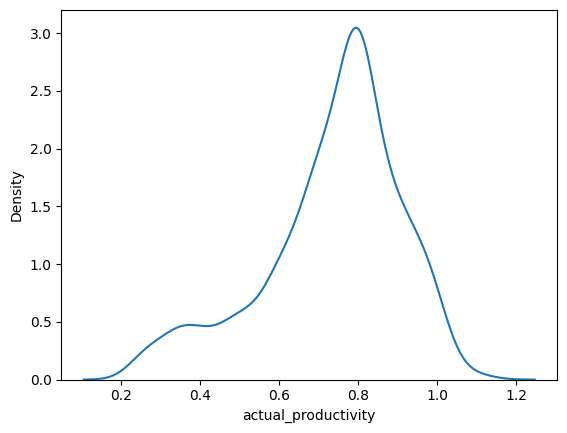

In [8]:
sns.kdeplot(data=df, x='actual_productivity')

<AxesSubplot: xlabel='actual_productivity'>

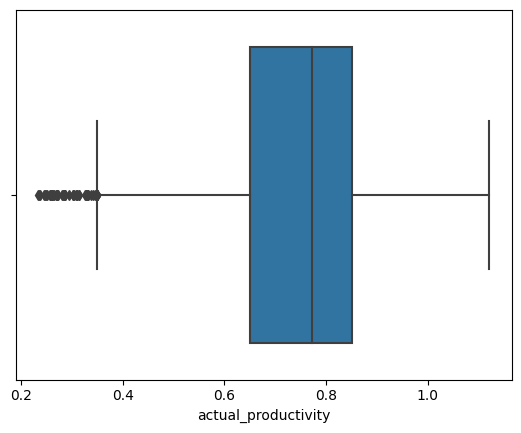

In [9]:
sns.boxplot(data=df,x='actual_productivity')

Boxplot cho thấy có nhiều giá trị ngoại lệ thấp.

## Correlations of numerical features

In [10]:
numerical_features = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
                    'no_of_style_change', 'no_of_workers', 'actual_productivity']
categorical_features = ['quarter', 'department', 'day', 'team']

In [11]:
df[numerical_features].corr()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.069489,0.035156,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.069489,1.000000,0.069815,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,0.035156,0.069815,1.000000,0.087760,0.054190,-0.020977,-0.038130,-0.037880,0.106235,0.074306
over_time,-0.088557,0.674887,0.087760,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,0.032768,0.032629,0.054190,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,-0.056181,0.056863,-0.020977,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,-0.053818,0.105901,-0.038130,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.209294,0.315388,-0.037880,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.084288,0.912176,0.106235,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991
actual_productivity,0.421594,-0.122089,0.074306,-0.054206,0.076538,-0.080851,-0.181734,-0.207366,-0.057991,1.000000


<AxesSubplot: >

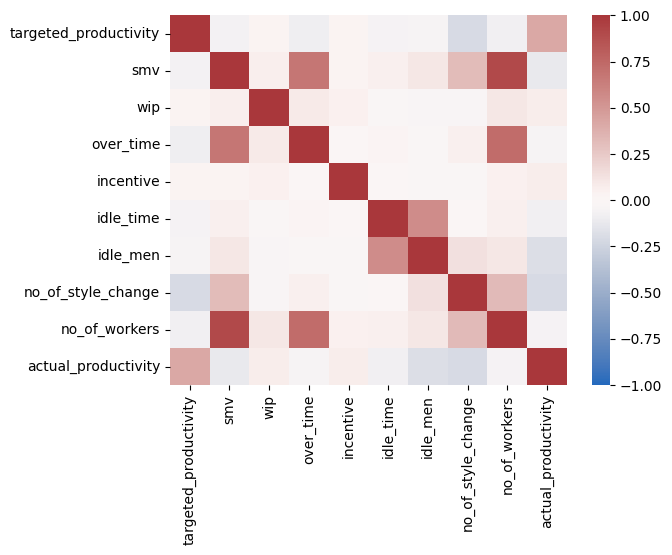

In [12]:
sns.heatmap(df[numerical_features].corr(), cmap=sns.color_palette("vlag", as_cmap=True), vmin=-1, vmax=1)

Biểu đồ heatmap cho thấy các biến kiểu số hầu như không có tương quan nào rõ rệt với biến 'actual_productivity', ngoại trừ biến 'targeted_productivity' có tương quan yếu.

In [13]:
stats.pearsonr(df['actual_productivity'],df['targeted_productivity'])

PearsonRResult(statistic=0.42159388370015033, pvalue=8.997899153176313e-53)

Mức độ tin cậy của tương quan là chắc chắn (p_value < 0.001).

<AxesSubplot: xlabel='targeted_productivity', ylabel='actual_productivity'>

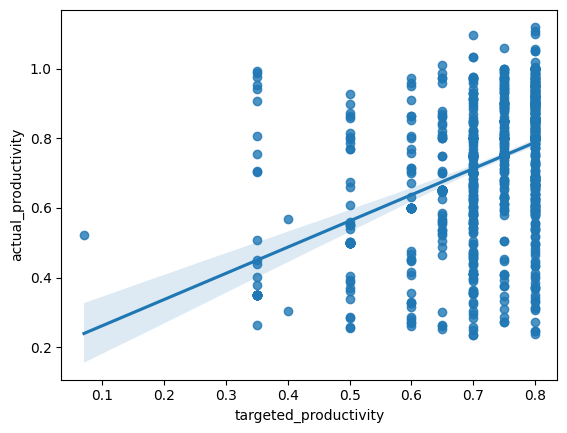

In [14]:
sns.regplot(data=df, x='targeted_productivity', y='actual_productivity')

Xét các tương quan khác.

In [15]:
cond = abs(df[numerical_features].corr()) >= 0.3
df[numerical_features].corr()[cond]

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421594
smv,NaN,1.000000,NaN,0.674887,NaN,NaN,NaN,0.315388,0.912176,NaN
wip,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over_time,NaN,0.674887,NaN,1.000000,NaN,NaN,NaN,NaN,0.734164,NaN
incentive,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
idle_time,NaN,NaN,NaN,NaN,NaN,1.000000,0.559146,NaN,NaN,NaN
idle_men,NaN,NaN,NaN,NaN,NaN,0.559146,1.000000,NaN,NaN,NaN
no_of_style_change,NaN,0.315388,NaN,NaN,NaN,NaN,NaN,1.000000,0.327787,NaN
no_of_workers,NaN,0.912176,NaN,0.734164,NaN,NaN,NaN,0.327787,1.000000,NaN
actual_productivity,0.421594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Thử giải thích các mối liên hệ: <br>
- smv vs. over_time: thời gian hoàn thành một tác vụ lớn có thể do tác vụ đó đòi hỏi vận hành phức tạp, dẫn tới có thể làm việc overtime mới hoàn thành được (tương quan thuận).
- smv vs. no_of_style_change: khi có thay đổi về quy cách và số lượng thay đổi nhiều thì dẫn đến thời gian hoàn thành tác vụ tăng (tương quan thuận), có thể do sự thay đổi làm các công nhân phải có giai đoạn thích nghi.
- smv vs. no_of_workers: thời gian hoàn thành một tác vụ lớn có thể do tác vụ đó đòi hỏi vận hành phức tạp, do đó cần nhiuề công nhân để hoàn thành được (tương quan thuận).
- over_time vs. no_of_workers: bắc cầu từ tương quan với smv (tương quan thuận).
- no_of_style_change vs. no_of_workers: bắc cầu từ tương quan với smv (tương quan thuận).
- idle_time vs. idle_men: idle_time xuất hiện khi quá trình sản xuất gặp một sự cố nào đó và bị gián đoạn phát sinh thời gian rảnh, và do đó các công nhân cũng rảnh theo.

## Effects of categorical features

In [16]:
categorical_features

['quarter', 'department', 'day', 'team']

### quarter $\rightarrow$ actual_productivity

In [17]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Text(0, 0.5, '')

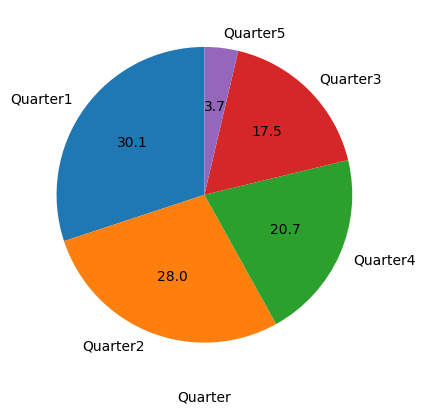

In [18]:
df['quarter'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')
plt.xlabel('Quarter')
plt.ylabel('')

<AxesSubplot: xlabel='quarter', ylabel='actual_productivity'>

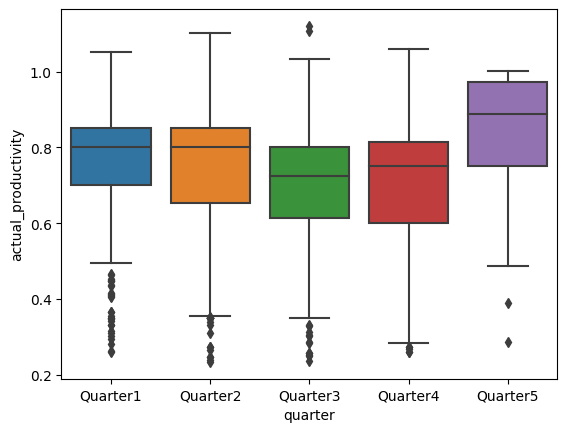

In [19]:
sns.boxplot(data=df,x='quarter',y='actual_productivity')

In [20]:
from statsmodels.stats.oneway import anova_oneway

aov = anova_oneway(data=df['actual_productivity'], groups=df['quarter'], use_var='equal')
print("Statistic =", aov.statistic)
print("p-value =", aov.pvalue)

Statistic = 7.111734975850184
p-value = 1.170397659389911e-05


Biến 'quarter' có ảnh hưởng đến biến 'actual_productivity' (p_value < 0.05).

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['actual_productivity'], groups=df['quarter'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
Quarter1 Quarter2  -0.0079 0.9753 -0.0437   0.028  False
Quarter1 Quarter3  -0.0468 0.0159 -0.0878 -0.0058   True
Quarter1 Quarter4  -0.0425 0.0244 -0.0814 -0.0036   True
Quarter1 Quarter5   0.0746 0.0538 -0.0007    0.15  False
Quarter2 Quarter3   -0.039 0.0782 -0.0805  0.0026  False
Quarter2 Quarter4  -0.0346 0.1175 -0.0742  0.0049  False
Quarter2 Quarter5   0.0825 0.0247  0.0068  0.1581   True
Quarter3 Quarter4   0.0043 0.9989 -0.0399  0.0486  False
Quarter3 Quarter5   0.1214 0.0002  0.0432  0.1997   True
Quarter4 Quarter5   0.1171 0.0004  0.0399  0.1943   True
--------------------------------------------------------


Post-hoc analysis bằng phương pháp TukeyHSD: ở Quarter1 và Quarter5 nhân viên có xu hướng làm việc hiệu quả hơn so với các quarter khác, như vậy khoảng thời gian đầu tháng và cuối tháng nhân viên làm việc có năng suất cao hơn.

### department $\rightarrow$ actual_productivity

In [22]:
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

Text(0, 0.5, '')

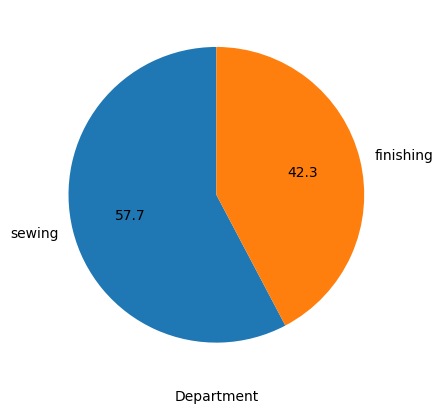

In [23]:
df['department'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')
plt.xlabel('Department')
plt.ylabel('')

<AxesSubplot: xlabel='department', ylabel='actual_productivity'>

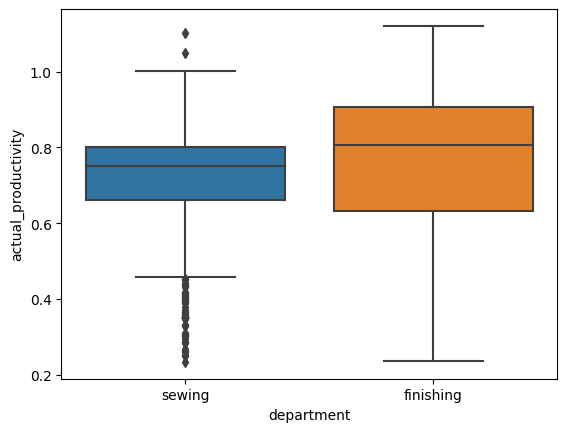

In [24]:
sns.boxplot(data=df,x='department',y='actual_productivity')

In [25]:
from statsmodels.stats.oneway import anova_oneway

aov = anova_oneway(data=df['actual_productivity'], groups=df['department'], use_var='equal')
print("Statistic =", aov.statistic)
print("p-value =", aov.pvalue)

Statistic = 9.246175421332554
p-value = 0.002411259977623153


Biến 'department' có ảnh hưởng đến biến 'actual_productivity' (p_value < 0.05).

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['actual_productivity'], groups=df['department'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj   lower  upper  reject
------------------------------------------------------
finishing sewing  -0.0309 0.0024 -0.0509 -0.011   True
------------------------------------------------------


Post-hoc analysis bằng phương pháp TukeyHSD: Nhân viên ở phòng ban finishing làm việc có năng suất cao hơn nhân viên ở phòng ban sewing.

### day $\rightarrow$ actual_productivity

In [27]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

Text(0, 0.5, '')

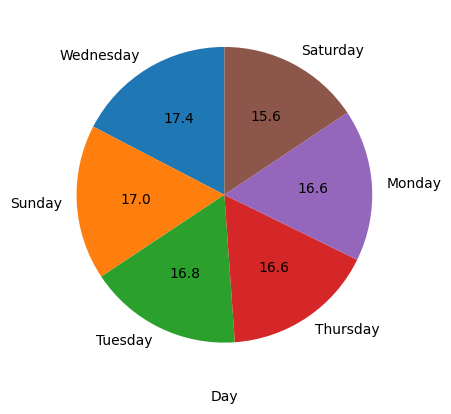

In [28]:
df['day'].value_counts().plot(kind='pie',startangle=90,autopct='%.1f')
plt.xlabel('Day')
plt.ylabel('')

<AxesSubplot: xlabel='day', ylabel='actual_productivity'>

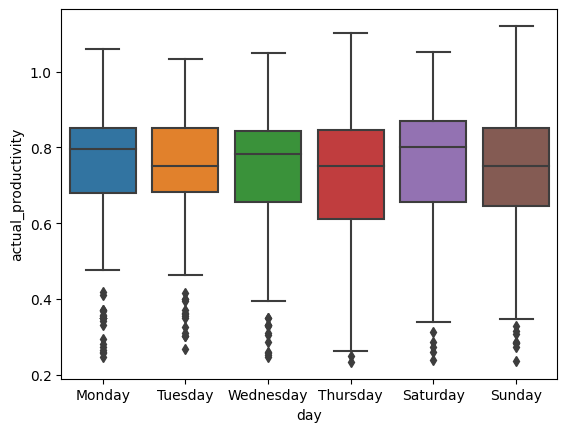

In [29]:
sns.boxplot(data=df,x='day',y='actual_productivity',order=['Monday','Tuesday','Wednesday','Thursday','Saturday','Sunday'])

In [30]:
from statsmodels.stats.oneway import anova_oneway

aov = anova_oneway(data=df['actual_productivity'], groups=df['day'], use_var='equal')
print("Statistic =", aov.statistic)
print("p-value =", aov.pvalue)

Statistic = 0.7121012009422492
p-value = 0.614378842438619


Biến 'day' không ảnh hưởng đến biến 'actual_productivity' (p_value > 0.05).

### team $\rightarrow$ actual_productivity

Xem xét các team khác nhau trong bộ dữ liệu.

In [31]:
df['team'].unique()

array(['Team8', 'Team1', 'Team11', 'Team12', 'Team6', 'Team7', 'Team2',
       'Team3', 'Team9', 'Team10', 'Team5', 'Team4'], dtype=object)

In [32]:
df.loc[df['department']=='sewing', 'team'].unique()

array(['Team8', 'Team11', 'Team12', 'Team6', 'Team7', 'Team3', 'Team2',
       'Team1', 'Team9', 'Team10', 'Team5', 'Team4'], dtype=object)

In [33]:
df.loc[df['department']=='finishing', 'team'].unique()

array(['Team1', 'Team2', 'Team10', 'Team8', 'Team4', 'Team7', 'Team11',
       'Team9', 'Team3', 'Team5', 'Team6', 'Team12'], dtype=object)

Như vậy, mỗi phòng ban 'sewing' và 'finishing' đều có 12 team khác nhau, và do vậy Team1 của phòng 'sewing' sẽ khác Team1 của phòng 'finishing' nên không thể gộp chung lại được.

Text(0, 0.5, '')

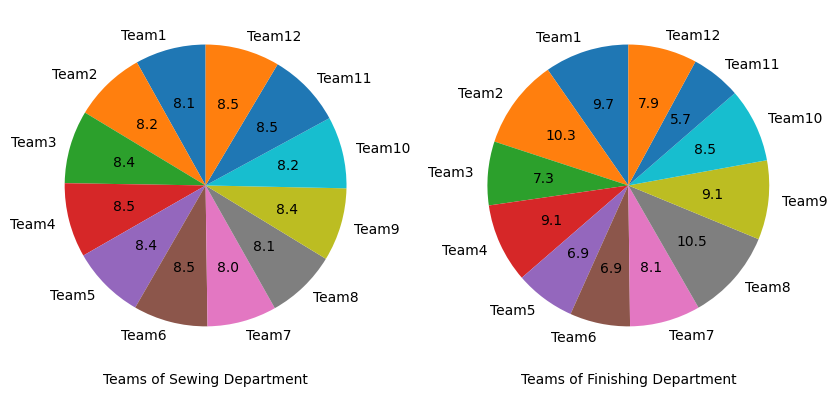

In [34]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
df.loc[df['department']=='sewing', 'team'].value_counts().reindex(['Team'+str(i) for i in range(1,13)]).plot(kind='pie',startangle=90,autopct='%.1f')
plt.xlabel('Teams of Sewing Department')
plt.ylabel('')
plt.subplot(1, 2, 2)
df.loc[df['department']=='finishing', 'team'].value_counts().reindex(['Team'+str(i) for i in range(1,13)]).plot(kind='pie',startangle=90,autopct='%.1f')
plt.xlabel('Teams of Finishing Department')
plt.ylabel('')

Text(0.5, 1.0, 'Actual productivity of Finishing department by teams')

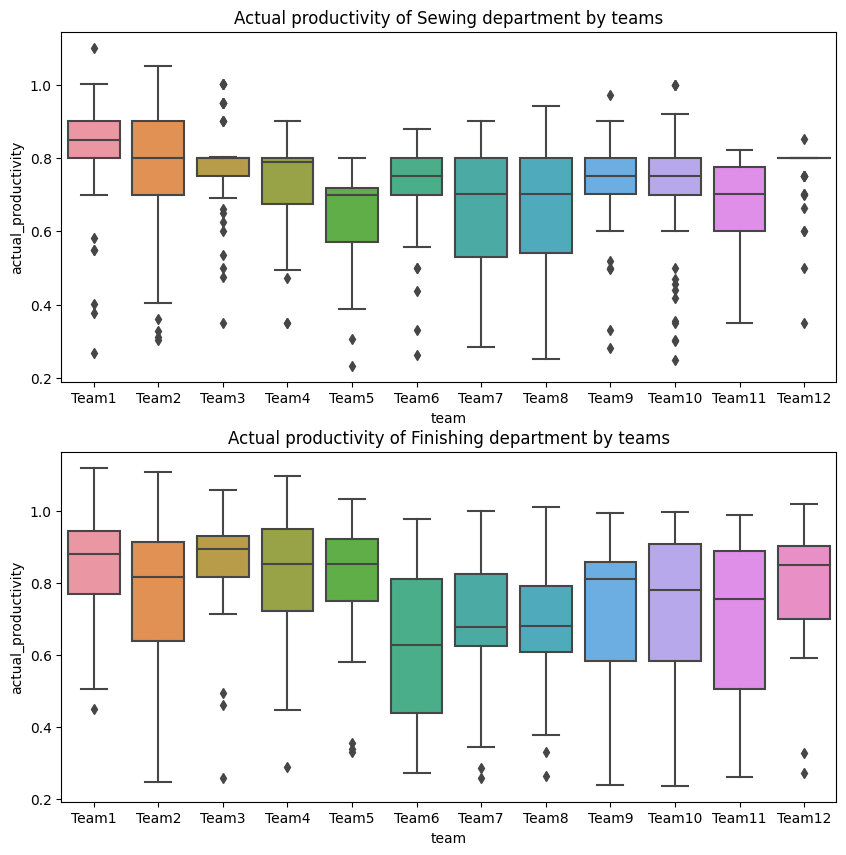

In [35]:
plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.boxplot(data=df[df['department']=='sewing'],x='team',y='actual_productivity',order=['Team'+str(i) for i in range(1,13)])
plt.title('Actual productivity of Sewing department by teams')

plt.subplot(2, 1, 2)
sns.boxplot(data=df[df['department']=='finishing'],x='team',y='actual_productivity',order=['Team'+str(i) for i in range(1,13)])
plt.title('Actual productivity of Finishing department by teams')

In [36]:
from statsmodels.stats.oneway import anova_oneway

df_sewing = df.loc[df['department']=='sewing']
aov = anova_oneway(data=df_sewing['actual_productivity'], groups=df_sewing['team'], use_var='equal')
print("Statistic =", aov.statistic)
print("p-value =", aov.pvalue)

Statistic = 8.03378889379953
p-value = 2.9323341741880856e-13


Trong phòng ban Sewing, biến 'team' có ảnh hưởng đến biến 'actual_productivity' (p_value < 0.05).

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_sewing['actual_productivity'], groups=df_sewing['team'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Team1 Team10  -0.0982 0.0205 -0.1888 -0.0076   True
 Team1 Team11   -0.139    0.0 -0.2288 -0.0492   True
 Team1 Team12  -0.0451 0.8909 -0.1349  0.0447  False
 Team1  Team2  -0.0528 0.7526 -0.1433  0.0378  False
 Team1  Team3   -0.039 0.9599 -0.1292  0.0512  False
 Team1  Team4  -0.0846 0.0871 -0.1744  0.0052  False
 Team1  Team5  -0.1737    0.0 -0.2638 -0.0835   True
 Team1  Team6  -0.0957 0.0253 -0.1855 -0.0059   True
 Team1  Team7  -0.1604    0.0 -0.2518 -0.0691   True
 Team1  Team8  -0.1585    0.0 -0.2495 -0.0676   True
 Team1  Team9  -0.0728 0.2553  -0.163  0.0174  False
Team10 Team11  -0.0408 0.9414 -0.1302  0.0486  False
Team10 Team12   0.0531 0.7285 -0.0363  0.1425  False
Team10  Team2   0.0454 0.8886 -0.0447  0.1356  False
Team10  Team3   0.0592 0.5774 -0.0306   0.149  False
Team10  Team4   0.0136    1.0 -0.0758   0.103 

Post-hoc analysis bằng phương pháp TukeyHSD: Nhân viên ở team 1, 2, 3 của phòng ban sewing làm việc có năng suất nhìn chung cao hơn nhân viên ở các team khác, team 5, 7, 8 có năng suất bình quân thấp nhất.

In [38]:
from statsmodels.stats.oneway import anova_oneway

df_finishing = df.loc[df['department']=='finishing']
aov = anova_oneway(data=df_finishing['actual_productivity'], groups=df_finishing['team'], use_var='equal')
print("Statistic =", aov.statistic)
print("p-value =", aov.pvalue)

Statistic = 5.2966449539854255
p-value = 6.089713378798481e-08


Trong phòng ban Finishing, biến 'team' có ảnh hưởng đến biến 'actual_productivity' (p_value < 0.05).

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df_finishing['actual_productivity'], groups=df_finishing['team'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Team1 Team10  -0.1044 0.2542 -0.2337  0.0249  False
 Team1 Team11   -0.134 0.1016 -0.2789   0.011  False
 Team1 Team12  -0.0355 0.9993 -0.1673  0.0964  False
 Team1  Team2  -0.0477 0.9823 -0.1708  0.0755  False
 Team1  Team3   0.0195    1.0 -0.1152  0.1543  False
 Team1  Team4  -0.0072    1.0 -0.1342  0.1199  False
 Team1  Team5  -0.0362 0.9994 -0.1731  0.1007  False
 Team1  Team6  -0.1999 0.0001 -0.3368  -0.063   True
 Team1  Team7   -0.142 0.0206 -0.2729  -0.011   True
 Team1  Team8  -0.1351 0.0168 -0.2578 -0.0125   True
 Team1  Team9  -0.1033 0.2445 -0.2303  0.0237  False
Team10 Team11  -0.0296    1.0 -0.1783  0.1191  False
Team10 Team12   0.0689 0.8831  -0.067  0.2048  False
Team10  Team2   0.0567 0.9503 -0.0708  0.1842  False
Team10  Team3   0.1239 0.1326 -0.0148  0.2626  False
Team10  Team4   0.0972 0.3859  -0.034  0.2285 

Post-hoc analysis bằng phương pháp TukeyHSD: Nhân viên ở team 1, 3, 4 của phòng ban finishing làm việc có năng suất nhìn chung cao hơn nhân viên ở các team khác, team 6, 7, 8 nhìn chung có năng suất làm việc thấp nhất.